_Einführung in Python, Clemens Brunner, 26.1.2017_

# 10 - Matplotlib und Seaborn

In Python gibt es eine große Anzahl an Paketen, welche sich auf das Erstellen von Grafiken spezialisiert haben. Die größten Vertreter sind momentan:

- [Matplotlib](http://matplotlib.org/)
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Plotly](https://plot.ly/)
- [Seaborn](http://seaborn.pydata.org/)
- [Altair](https://github.com/altair-viz/altair)
- [ggpy](https://github.com/yhat/ggpy) (ehemals ggplot)

Matplotlib ist hier das älteste und bekannteste Paket, es ist aber manchmal relativ umständlich zu bedienen und modernen Anforderungen vielleicht nicht ganz so gewachsen wie aktuellere Pakete. Bokeh und Ploty können vor allem interaktive Grafiken für Webanwendungen erstellen - dies ist sehr praktisch wenn man Daten interaktiv grafisch untersuchen möchte. Seaborn, Altair und ggpy haben sich auf statistische Grafiken spezialisiert. Seaborn baut auf Matplotlib auf und bietet sehr viele zusätzliche Grafikarten. Altair ist relativ neu und hat sich das Ziel gesetzt, komplexe Grafiken möglichst einfach erstellen zu können. Schließlich gibt es noch ggpy, welches sehr ähnlich wie ggplot2 für R zu verwenden ist, da es ebenfalls die Grammar of Graphics implementiert.

## Matplotlib
Mit Matplotlib kann man verschiedenste Grafiken vor allem für wissenschaftliche Zwecke erstellen. Meist stehen die darzustellenden Daten als NumPy-Arrays zur Verfügung. Die Verwendung von Matplotlib orientiert sich dabei an MATLAB, d.h. die Befehle sehen sehr ähnlich aus (zumindest wird meistens das Interface benutzt, welches sich an MATLAB orientiert - grundsätzlich unterscheiden sich die beiden Systeme aber natürlich grundlegend voneinander). Wir beginnen wieder mit den entsprechenden Import-Befehlen:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In IPython initialisiert man dann zusätzlich den Ausgabemodus mit folgendem Befehl:

In [2]:
%matplotlib

Using matplotlib backend: MacOSX


Wenn man die Plots direkt in der Konsole (d.h. nicht in einem extra Fenster) sehen möchte, kann man stattdessen folgendes eintippen (funktioniert z.B. in Spyder und IPython QtConsole):

In [3]:
%matplotlib inline

### x/y-Plots
Eine der wichtigsten Funktionen in Matplotlib ist `plot`. Eine einfache Liniengrafik erhält man damit wie folgt:

[10 20 30 40 50 60 70 80 90]


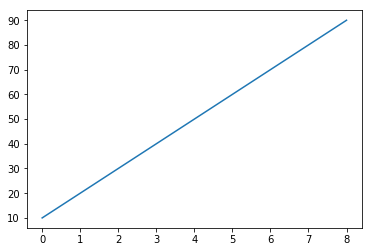

In [4]:
y = np.arange(10, 100, 10)
print(y)
plt.plot(y)

Man kann diese Daten auch als Punktgrafik plotten und muss hier nur entsprechende Argumente übergeben. Im Beispiel unten wird als Format-Argument ein `x` übergeben, was die Darstellung dementsprechend verändert. In diesem Format-String kann man sowohl die Symbole als auch die Farben ändern. In der [Dokumentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) gibt es eine Übersicht aller möglichen Werte.

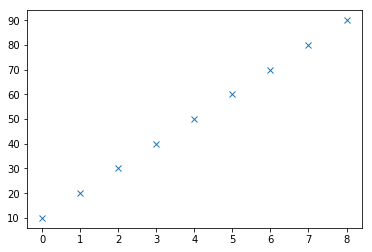

In [5]:
plt.plot(y, "x")

In den vorigen Plots wurde die x-Achse automatisch erstellt - man kann diese aber auch explizit angeben und so einen Scatterplot erstellen.

In [6]:
x = np.random.random(100)
y = x + np.random.random(100)

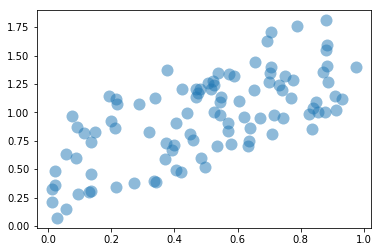

In [7]:
plt.plot(x, y, "o", alpha=0.5, markeredgecolor="None", markersize=12)

Man kann auch mehrere Datenreihen gleichzeitig darstellen.

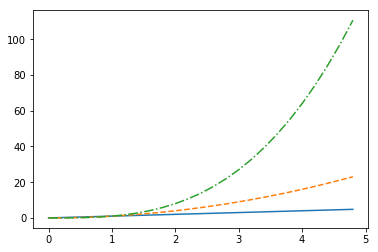

In [8]:
t = np.arange(0, 5, 0.2)
plt.plot(t, t, t, t**2, "--", t, t**3, "-.")

### Subplots
Man kann ebenso einfach mehrere Subplots in einer Figure erstellen. Genau wie MATLAB hat auch Matplotlib das Konzept einer Figure sowie einer Achse. Alle Plot-Befehle beziehen sich immer auf die aktuelle Achse. Indem man in einer Figure mehrere Achsen erstellt, kann man so mehrere Plots gleichzeitig darstellen.

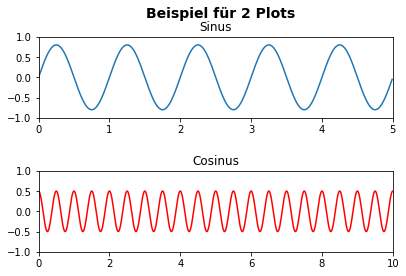

In [9]:
plt.figure(1)
plt.subplot(2, 1, 1)
t = np.arange(0, 5, 0.01)
plt.plot(t, 0.8*np.sin(2*np.pi*t))
plt.axis([0, 5, -1, 1])
plt.title("Sinus")

plt.subplot(2, 1, 2)
t = np.arange(0, 10, 0.01)
plt.plot(t, 0.5*np.cos(4*np.pi*t), "r")
plt.axis([0, 10, -1, 1])
plt.title("Cosinus")

plt.suptitle("Beispiel für 2 Plots", x=0.54, fontsize=14, fontweight="bold")  # Gesamttitel für mehrere Plots
plt.tight_layout(pad=2)

Im obigen Beispiel wird mit `plt.figure(1)` eine Figure mit der Nummer 1 erzeugt. Danach wird mit `plt.subplot(2, 1, 1)` eine neue Achse erzeugt. Das Argument `2, 1, 1` bedeutet, dass die Figure Achsen in 2 Zeilen und 1 Spalte haben soll. Die erste Achse wird dann aktiviert (d.h. alle Plot-Befehle beziehen sich auf diese Achse).

Das Befehl `plt.axis` ändert die Skalierung der aktuellen Achsen; hier gibt man die Werte für `xmin`, `xmax`, `ymin` und `ymax` in einer Liste an.

Der Befehl `plt.title` fügt der aktuellen Achse einen Titel hinzu. Mit `plt.xlabel` bzw. `plt.ylabel` könnte man noch Beschriftungen für die x- bzw. y-Achsen hinzufügen.

Will man eine Figure mit mehreren Achsen mit einem Titel versehen, verwendet man die Funktion `plt.suptitle` (im Beispiel oben werden zusätzlich einige Defaultwerte überschrieben).

Schließlich kann man mit dem Befehl `tight_layout` noch die Abstände zwischen den Subplots optimieren.

### Histogramme
Mit der Funktion `plt.hist` kann man Histogramme erstellen.

(array([   11.,    75.,   446.,  1605.,  2914.,  2920.,  1521.,   441.,
           61.,     6.]),
 array([  38.90631603,   51.1452911 ,   63.38426618,   75.62324125,
          87.86221633,  100.10119141,  112.34016648,  124.57914156,
         136.81811664,  149.05709171,  161.29606679]),
 <a list of 10 Patch objects>)

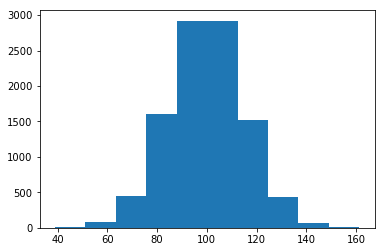

In [10]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.hist(x)

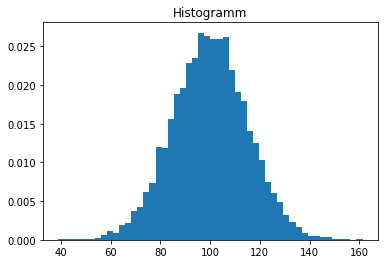

In [11]:
plt.hist(x, bins=50, normed=True)
plt.title("Histogramm")

### Balkengrafiken
Ein [Beispiel](http://matplotlib.org/examples/pylab_examples/barchart_demo.html) aus der Dokumentation demonstriert, wie man ein Bar Chart erstellen kann.

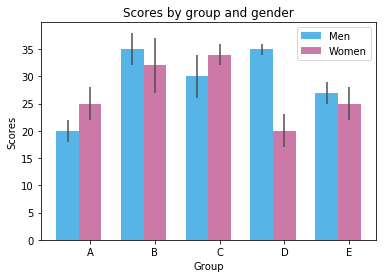

In [12]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

index = np.arange(n_groups)
bar_width = 0.35

plt.bar(index, means_men, bar_width,
        color="#56B4E9",
        yerr=std_men,
        error_kw={"ecolor": "0.3"},
        label="Men")

_ = plt.bar(index + bar_width, means_women, bar_width,
            color="#CC79A7",
            yerr=std_women,
            error_kw={"ecolor": "0.3"},
            label="Women")

plt.xlabel("Group")
plt.ylabel("Scores")
plt.title("Scores by group and gender")
plt.xticks(index + bar_width, ("A", "B", "C", "D", "E"))
_ = plt.legend()

Dieselben Daten können auch als gestapelter Bar Chart dargestellt werden.

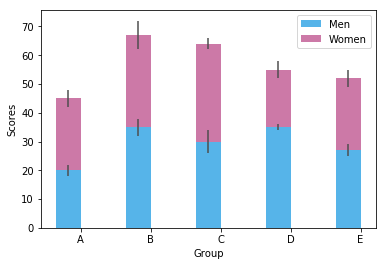

In [13]:
plt.bar(index, means_men, bar_width,
        color="#56B4E9",
        yerr=std_men,
        error_kw={"ecolor": "0.3"},
        label="Men")
plt.bar(index, means_women, bar_width,
        bottom=means_men,
        color="#CC79A7",
        yerr=std_women,
        error_kw={"ecolor": "0.3"},
        label="Women")
plt.xlabel("Group")
plt.ylabel("Scores")
plt.xticks(index + bar_width/2, ("A", "B", "C", "D", "E"))
plt.legend().get_frame().set_facecolor("white")  # weißer Hintergrund in Legende

## Seaborn
Wie bereits erwähnt baut Seaborn auf Matplotlib auf und fügt einige sehr nützliche Grafiktypen hinzu. Das Paket Seaborn wird normalerweise nicht automatisch mit Anaconda installiert, deswegen muss man es erst installieren (entweder über den Anaconda Navigator oder in der Kommandozeile mittels `conda install seaborn`). Danach importiert man das Paket wie folgt:

In [14]:
import seaborn as sns

Es folgen nun einige Beispiele aus der Seaborn-Dokumentation, welche die Leistungsfähigkeit des Pakets demonstrieren sollen. Anzumerken ist noch, dass Seaborn besonders gut mit Pandas zusammenarbeitet - d.h. wenn die Daten in einem Pandas DataFrame vorhanden sind, kann man die meisten Seaborn-Befehle darauf direkt anwenden. Eine kurze Einführung zu Pandas folgt in der nächsten Einheit.

### Verteilungen

/Users/clemens/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


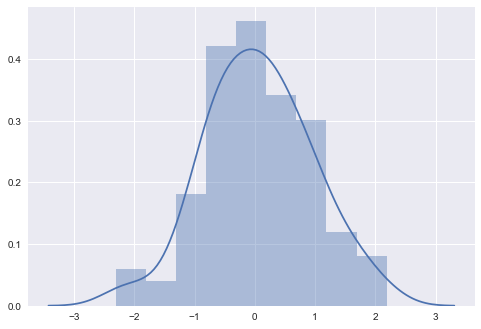

In [15]:
np.random.seed(1)
x = np.random.normal(size=100)
sns.distplot(x)

### Paarweise Beziehungen

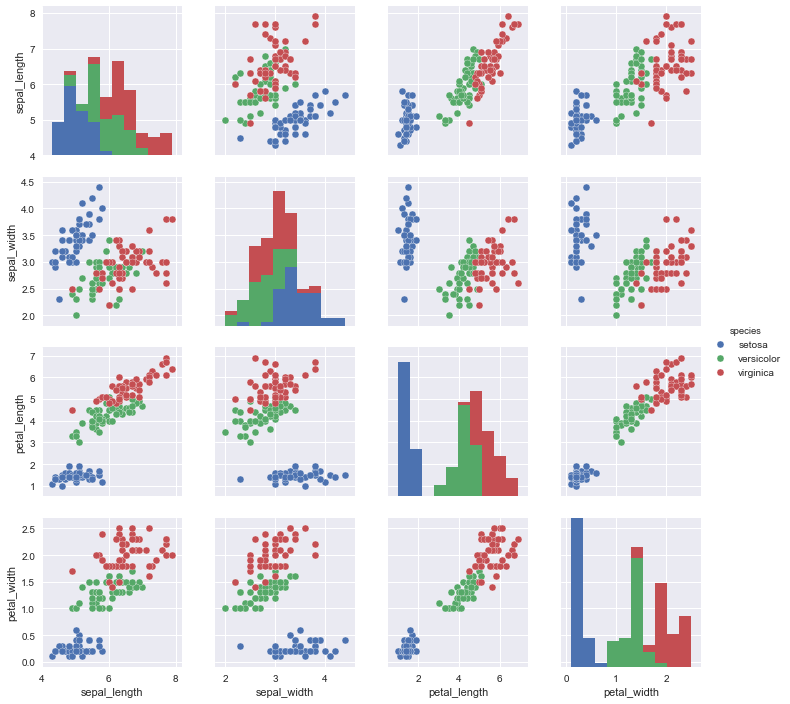

In [16]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

### Lineare Regression

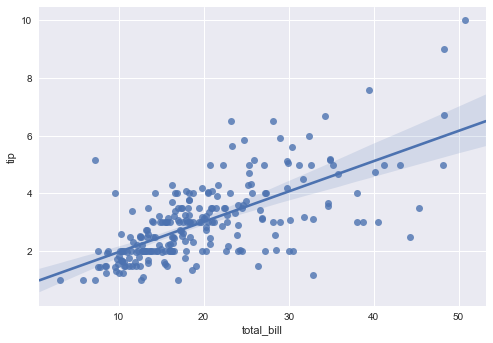

In [17]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)